**Análise Discriminante**

> Utilizando o dataset load_wine, importado pelo **sklearn.datasets**

**Parte 1 - Variância**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np

In [ ]:
dadosVariancia = [20, 32, 32, 36, 39, 43, 46, 48, 49, 50, 52, 53, 56, 57, 63,
                  64, 65, 74, 75, 90]

In [ ]:
variancia = np.var(dadosVariancia)
print('O resultado da variância é: ', variancia)

O resultado da variância é:  266.36


**Parte 2 - Discriminante Linear**

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
wine = load_wine()

X = pd.DataFrame(wine.data, columns=wine.feature_names)
Y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
Y

['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [ ]:
df = X.join(pd.Series(Y, name='class'))

**Criando as matrizes de dispersão**

In [ ]:
class_feature_means = pd.DataFrame(columns=wine.target_names)

for c, rows in df.groupby('class'):
  class_feature_means[c] = rows.mean()

  class_feature_means

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [ ]:
within_class_scatter_matrix = np.zeros((13, 13))

for c, rows in df.groupby('class'):
  rows = rows.drop(['class'], axis = 1)
  s = np.zeros((13, 13))

  for index, row in rows.iterrows():
      x = row.values.reshape(13, 1)
      mc = class_feature_means[c].values.reshape(13,1)
      s += (x - mc).dot((x-mc).T)
      within_class_scatter_matrix += s

In [ ]:
within_class_scatter_matrix

array([[ 1.5661e+03, -2.1747e+02, -9.8361e+01, -6.9884e+02, -3.4322e+02,
         2.3413e+02,  2.5202e+02, -8.7897e+00,  4.7823e+01,  1.5113e+03,
         3.6474e+01, -4.1445e+01,  1.0326e+05],
       [-2.1747e+02,  3.9077e+03,  2.1451e+02,  3.4245e+03, -4.2141e+03,
        -1.3139e+02, -5.6707e+00,  9.2470e+01,  1.9494e+02, -1.0829e+03,
        -1.7454e+02,  2.7434e+02, -1.8871e+05],
       [-9.8361e+01,  2.1451e+02,  3.7991e+02,  3.0423e+03,  3.2627e+03,
         7.8215e+01,  1.3690e+02,  4.0492e+01,  5.8826e+01, -9.3399e+01,
         1.0597e+01,  7.6824e+01, -8.2537e+03],
       [-6.9884e+02,  3.4245e+03,  3.0423e+03,  5.1290e+04,  1.5304e+04,
         7.4097e+02,  1.5592e+03,  1.4699e+02,  9.5404e+02, -1.5222e+03,
         1.9302e+00,  2.1306e+03, -1.4144e+05],
       [-3.4322e+02, -4.2141e+03,  3.2627e+03,  1.5304e+04,  1.1796e+06,
         2.1477e+03,  5.6487e+02, -1.9368e+03,  8.7271e+03,  4.5693e+03,
         7.3198e+02, -2.5255e+03,  3.4961e+06],
       [ 2.3413e+02, -1.3139e+

In [ ]:
feature_names = df.mean()

between_class_scatter_matrix = np.zeros((13, 13))
for c in class_feature_means:
  n = len(df.loc[df['class'] == c].index)
  mc = class_feature_means[c].values.reshape(13, 1)
  m = feature_names.values.reshape(13, 1)
  between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
feature_names

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [ ]:
between_class_scatter_matrix

array([[ 7.0795e+01,  1.3723e+01,  1.0668e+01, -1.3186e+02,  5.5262e+02,
         2.1257e+01,  3.0029e+01, -2.6178e+00,  8.3076e+00,  1.3888e+02,
        -2.4933e+00,  8.2530e+00,  2.6987e+04],
       [ 1.3723e+01,  6.5578e+01,  5.1556e+00,  1.1793e+02,  1.5062e+00,
        -3.8943e+01, -7.9531e+01,  5.4292e+00, -2.7994e+01,  1.5941e+02,
        -1.7995e+01, -5.9906e+01, -6.1709e+03],
       [ 1.0668e+01,  5.1556e+00,  1.7592e+00, -1.2829e+01,  7.8095e+01,
         1.0900e+00,  3.3671e-01, -1.0316e-01, -2.0087e-01,  2.7430e+01,
        -1.2351e+00, -1.7747e+00,  3.5073e+03],
       [-1.3186e+02,  1.1793e+02, -1.2829e+01,  5.7283e+02, -1.2702e+03,
        -1.3780e+02, -2.5058e+02,  1.8415e+01, -8.2987e+01,  4.3483e+01,
        -3.5293e+01, -1.5564e+02, -7.6268e+04],
       [ 5.5262e+02,  1.5062e+00,  7.8095e+01, -1.2702e+03,  4.4910e+03,
         2.3822e+02,  3.7768e+02, -3.0399e+01,  1.1454e+02,  8.6166e+02,
         9.9330e+00,  1.6767e+02,  2.2980e+05],
       [ 2.1257e+01, -3.8943e+

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(
    within_class_scatter_matrix).dot(between_class_scatter_matrix))

pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i])
for i in range(len(eigen_values))]

pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

for pair in pairs:
  print(pair[0])

0.28157790627842666
0.13792561974216463
3.041600206500872e-17
2.7755575615628914e-17
2.0153979511255155e-17
2.0153979511255155e-17
1.9295514004417214e-17
1.9295514004417214e-17
1.8493670211047632e-17
1.8493670211047632e-17
5.249658186322264e-18
5.249658186322264e-18
2.387674729032832e-18


In [ ]:
w_matrix = np.hstack((pairs[0][1].reshape(13, 1),
                      pairs[1][1].reshape(13, 1))).real
X_lda = np.array(X.dot(w_matrix))
X_lda                      

array([[ 3.0179e+00,  4.2676e+00],
       [ 3.0147e+00,  4.0731e+00],
       [ 2.6426e+00,  4.1372e+00],
       [ 2.8173e+00,  4.7211e+00],
       [ 2.2189e+00,  3.8762e+00],
       [ 2.9831e+00,  4.5070e+00],
       [ 2.9093e+00,  4.5837e+00],
       [ 2.9189e+00,  4.5237e+00],
       [ 2.7258e+00,  4.2134e+00],
       [ 2.6491e+00,  4.1813e+00],
       [ 2.9669e+00,  4.3007e+00],
       [ 2.6426e+00,  4.2618e+00],
       [ 2.7176e+00,  4.3082e+00],
       [ 3.2076e+00,  4.2734e+00],
       [ 3.1423e+00,  4.6774e+00],
       [ 2.6635e+00,  4.4931e+00],
       [ 2.6386e+00,  4.3921e+00],
       [ 2.6412e+00,  4.0411e+00],
       [ 3.2082e+00,  4.6397e+00],
       [ 2.6422e+00,  4.3483e+00],
       [ 2.7284e+00,  3.9175e+00],
       [ 2.2007e+00,  4.1080e+00],
       [ 3.0839e+00,  4.0101e+00],
       [ 2.6334e+00,  3.9290e+00],
       [ 2.6552e+00,  3.8578e+00],
       [ 2.4220e+00,  3.7757e+00],
       [ 2.8998e+00,  4.2806e+00],
       [ 2.4795e+00,  3.9852e+00],
       [ 2.7405e+00,

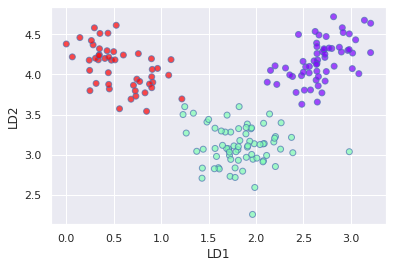

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df['class'])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='rainbow', alpha=0.7,
            edgecolors='b')

**Aplicando de forma mais simples**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
wine = load_wine()

X = pd.DataFrame(wine.data, columns = wine.feature_names)
Y = pd.Categorical.from_codes(wine.target, wine.target_names)

df = X.join(pd.Series(Y, name = 'class'))

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df['class'])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

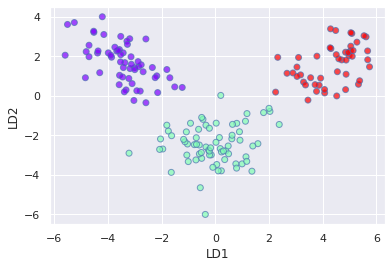

In [ ]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='rainbow', alpha=0.7
            , edgecolors='b')

**Representação visual por meio de Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
wine = load_wine()

X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state = 1)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9074074074074074


In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

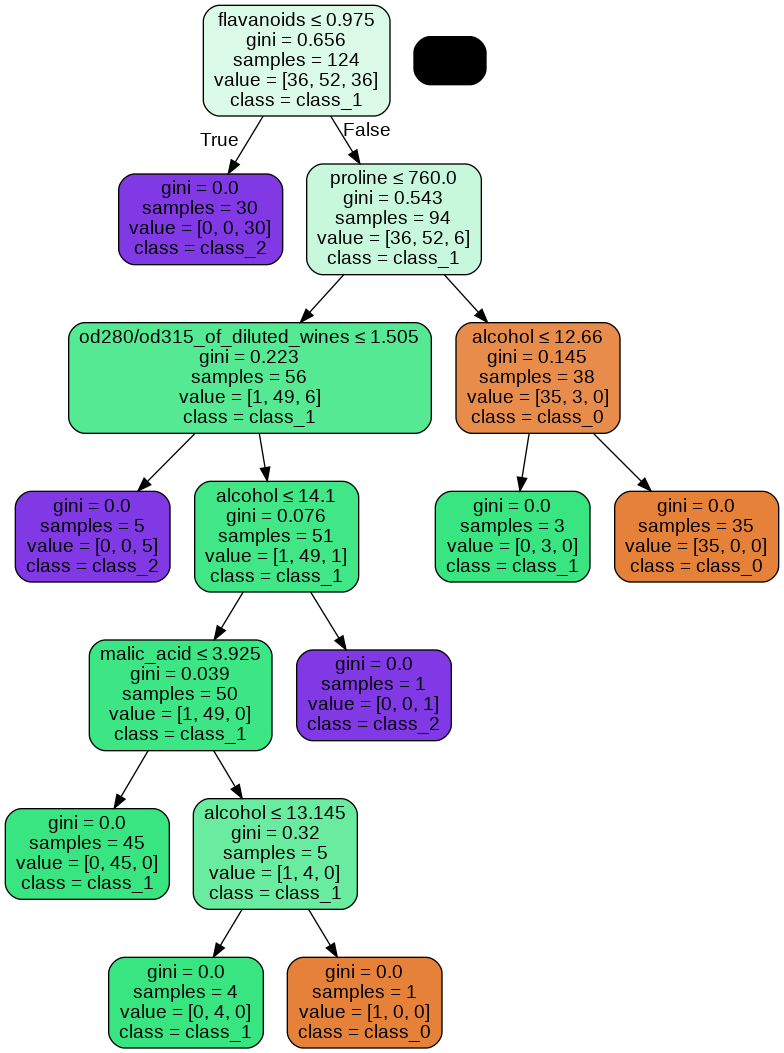

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled=True, rounded=True,
                special_characters = True, feature_names=wine.feature_names,
                class_names=wine.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wines.png')
Image(graph.create_png())

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9444444444444444


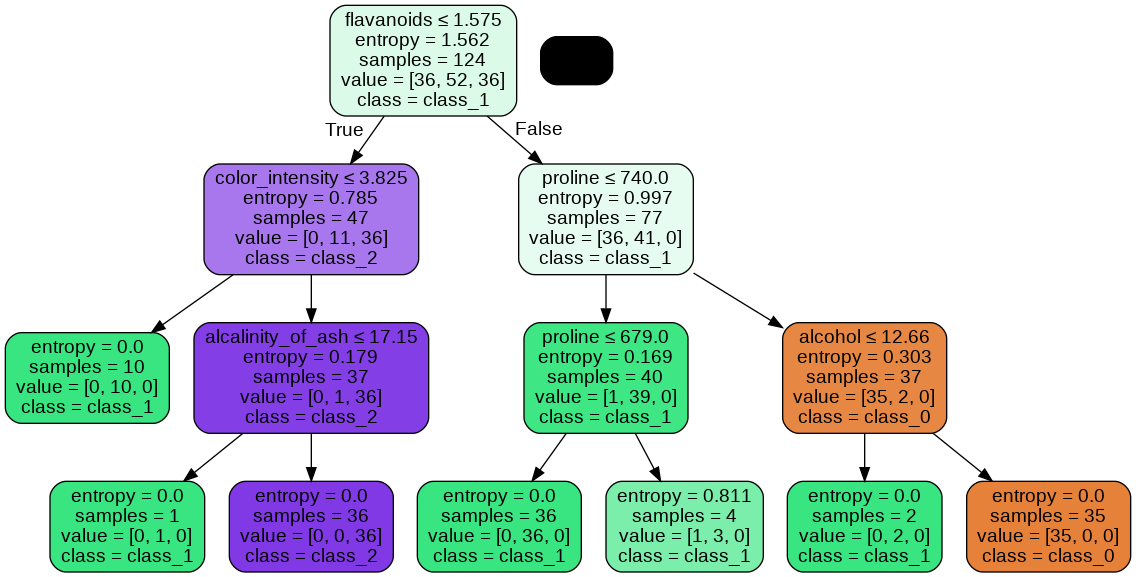

In [ ]:
#vinho!!
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled=True, rounded=True,
                special_characters = True, feature_names=wine.feature_names,
                class_names=wine.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wines.png')
Image(graph.create_png())